# Hyper-mutated and hypo-mutated threshold study and mutation frequency analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Datasets/Breast Invasive Carcinoma (TCGA, PanCancer Atlas)")

# TOTAL DUCTAL 

In [3]:
data_mutation_TOTAL_ductal=pd.read_csv('mutation_table_TCGA_PanCancer2018_TOTAL_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal.iloc[:, 1:]
data_mutation_TOTAL_ductal

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Gene_length,ENSP
0,TCGA-3C-AALI,TCGA-3C-AALI-01,BTRC,10,103292795.0,103292795.0,Silent,SNP,G,G,A,ENST00000370187.3:c.1065G>A,p.V355=,355.0,203259,ENSP00000359206
1,TCGA-3C-AALI,TCGA-3C-AALI-01,NFKB2,10,104157126.0,104157126.0,Nonsense_Mutation,SNP,C,C,T,ENST00000369966.3:c.463C>T,p.Q155*,155.0,8415,ENSP00000358983
2,TCGA-3C-AALI,TCGA-3C-AALI-01,DHX32,10,127542738.0,127542738.0,Missense_Mutation,SNP,C,C,A,ENST00000284690.3:c.884G>T,p.G295V,295.0,60100,ENSP00000284690
3,TCGA-3C-AALI,TCGA-3C-AALI-01,FOXI2,10,129536865.0,129536865.0,Missense_Mutation,SNP,G,G,A,ENST00000388920.4:c.593G>A,p.R198K,198.0,3952,ENSP00000373572
4,TCGA-3C-AALI,TCGA-3C-AALI-01,NMT2,10,15154945.0,15154945.0,Silent,SNP,C,C,T,ENST00000378165.4:c.1188G>A,p.L396=,396.0,66110,ENSP00000367407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94479,TCGA-WT-AB41,TCGA-WT-AB41-01,ALPPL2,2,233274646.0,233274646.0,3'UTR,SNP,G,G,A,NaN,NaN,NaN,3872,ENSP00000295453
94480,TCGA-WT-AB41,TCGA-WT-AB41-01,ASAP2,2,9545025.0,9545025.0,3'UTR,SNP,A,A,T,NaN,NaN,NaN,198919,ENSP00000353850
94481,TCGA-WT-AB41,TCGA-WT-AB41-01,ECE2,3,184010274.0,184010274.0,3'UTR,SNP,A,A,G,NaN,NaN,NaN,43382,ENSP00000384223
94482,TCGA-WT-AB41,TCGA-WT-AB41-01,KCNH8,3,19575954.0,19575954.0,3'UTR,SNP,C,C,T,NaN,NaN,NaN,387193,ENSP00000328813


In [4]:
# check if there are duplicate rows 
data_mutation_TOTAL_ductal.duplicated().sum()

0

### Mutation Rate analysis

In [5]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_TOTAL_ductal.loc[:, 'Mutation_length'] = data_mutation_TOTAL_ductal['End_Position']-data_mutation_TOTAL_ductal['Start_Position']+1

In [6]:
data_mutation_TOTAL_ductal['PATIENT_ID'].nunique()

752

In [7]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_TOTAL_ductal = data_mutation_TOTAL_ductal[['PATIENT_ID', 'Mutation_length']]

In [8]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_TOTAL_ductal_group_by_pts=pts_mutation_length_TOTAL_ductal.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_TOTAL_ductal_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [9]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal[['Hugo_Symbol', 'Gene_length']]

In [10]:
# look at the number of distinct genes
gene_length_for_each_mutation_TOTAL_ductal['Hugo_Symbol'].nunique()

18054

In [11]:
# group by gene (Hugo_Symbol) 
mutation_TOTAL_ductal_group_by_gene=gene_length_for_each_mutation_TOTAL_ductal.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [12]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_TOTAL_ductal = mutation_TOTAL_ductal_group_by_gene['Gene_length'].sum()

In [13]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_TOTAL_ductal_group_by_pts["Mutation_rate"] = mutation_TOTAL_ductal_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_TOTAL_ductal

In [14]:
# multiply the Mutation_rate values for 10^6
mutation_TOTAL_ductal_group_by_pts["Mutation_rate*10^6"] = mutation_TOTAL_ductal_group_by_pts["Mutation_rate"]*1000000

In [15]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_TOTAL_ductal_group_by_pts= mutation_TOTAL_ductal_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [16]:
patient_mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [17]:
# adjust the indices
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.reset_index()
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.drop('index', axis=1)

In [18]:
patients_TOTAL_ductal=np.arange(0,752,1)
# convert a series into a Numpy array
mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['Mutation_rate*10^6']].to_numpy()

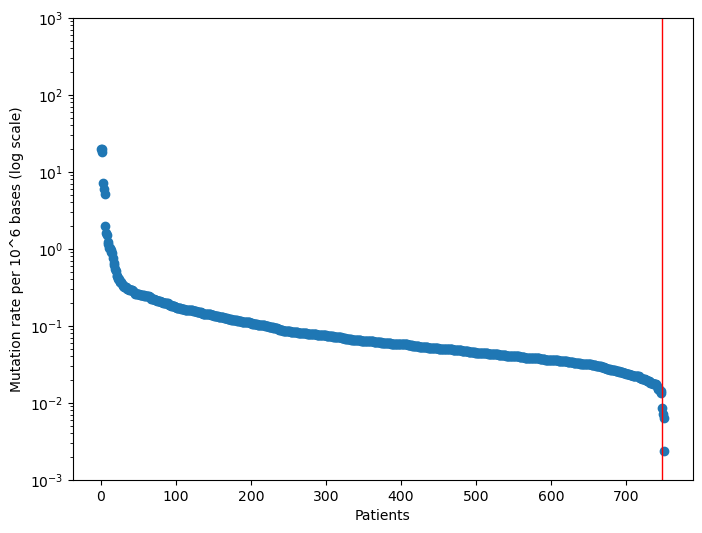

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.axvline(x=748, color='red', linestyle='-', linewidth = 1, label='x = 748')
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Manual study of the thresholds

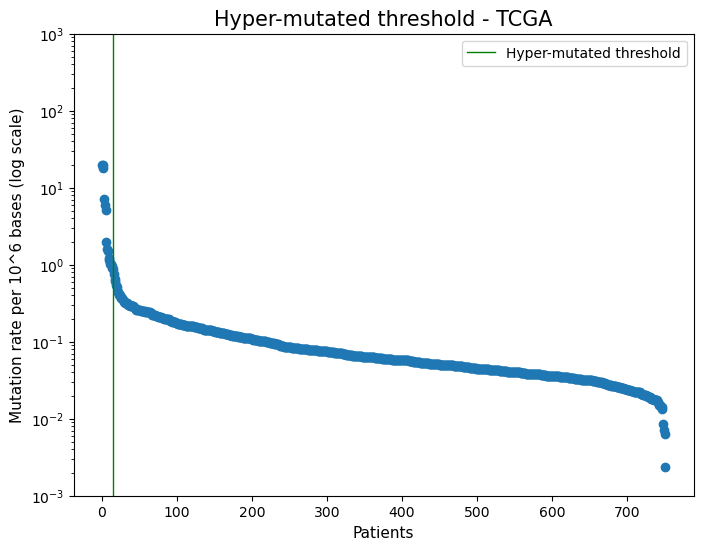

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
#plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')
plt.axvline(x=14.3, color='green', linestyle='-', linewidth = 1, label='Hyper-mutated threshold')
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
plt.title("Hyper-mutated threshold - TCGA", fontsize=15)
plt.legend(fontsize=10)
plt.show()

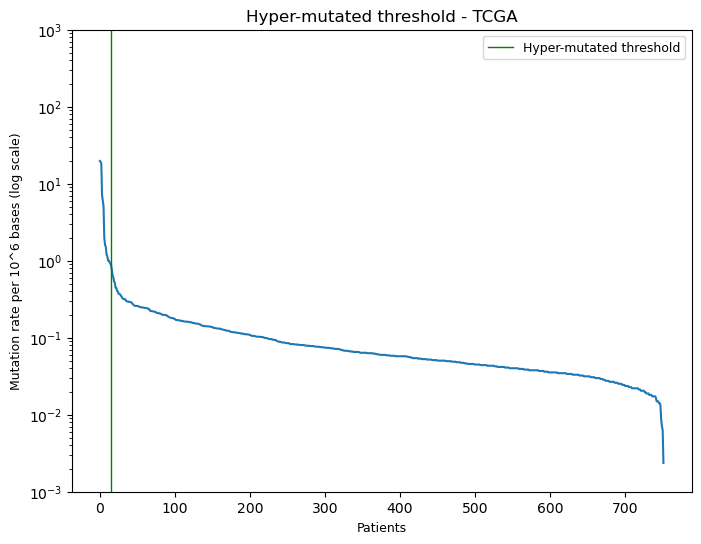

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
#plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')
plt.axvline(x=14.3, color='green', linestyle='-', linewidth = 1, label='Hyper-mutated threshold')
plt.xlabel("Patients", fontsize=9)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=9)
plt.title("Hyper-mutated threshold - TCGA", fontsize=12)
plt.legend(fontsize=9)
plt.show()

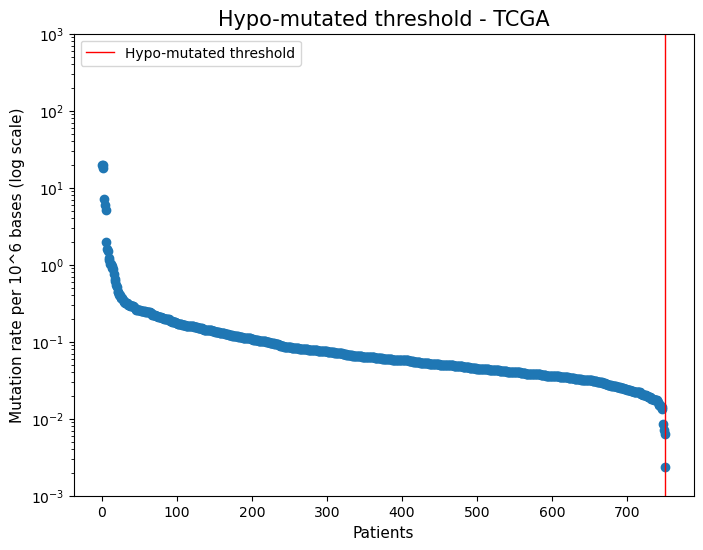

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
#plt.axhline(y=0.0035, color='red', linestyle='-', label='Hypo-mutated threshold')
plt.axvline(x=750.5, color='red', linestyle='-', linewidth = 1, label='Hypo-mutated threshold')
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
plt.title("Hypo-mutated threshold - TCGA", fontsize=15)
plt.legend(fontsize=10)
plt.show()

In [23]:
array_mutation_rate_TOTAL_ductal = np.array(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6'])

### Study of the thresholds with KneeLocator

In [24]:
colonne_iper = ['Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap']
df_soglia_iper = pd.DataFrame(columns = colonne_iper)

745
dx_3: 744
yx_3: -1.8251588738993363
dx_4: 745
yx_4: -1.8486399697488591
gap_max 0.02348109584952285
dim_finale_x_sx: 744
dim_inizio_y_sx: 8
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 

671
dx_3: 670
yx_3: -1.5357107507851702
dx_4: 671
yx_4: -1.5476099740848779
gap 0.011899223299707717
dim_finale_x: 670
dim_inizio_y: 82
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 

530
dx_3: 529
yx_3: -1.3715187150291968
dx_4: 530
yx_4: -1.3796366052513762
gap 0.008117890222179458
dim_finale_x: 529
dim_inizio_y: 223
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212

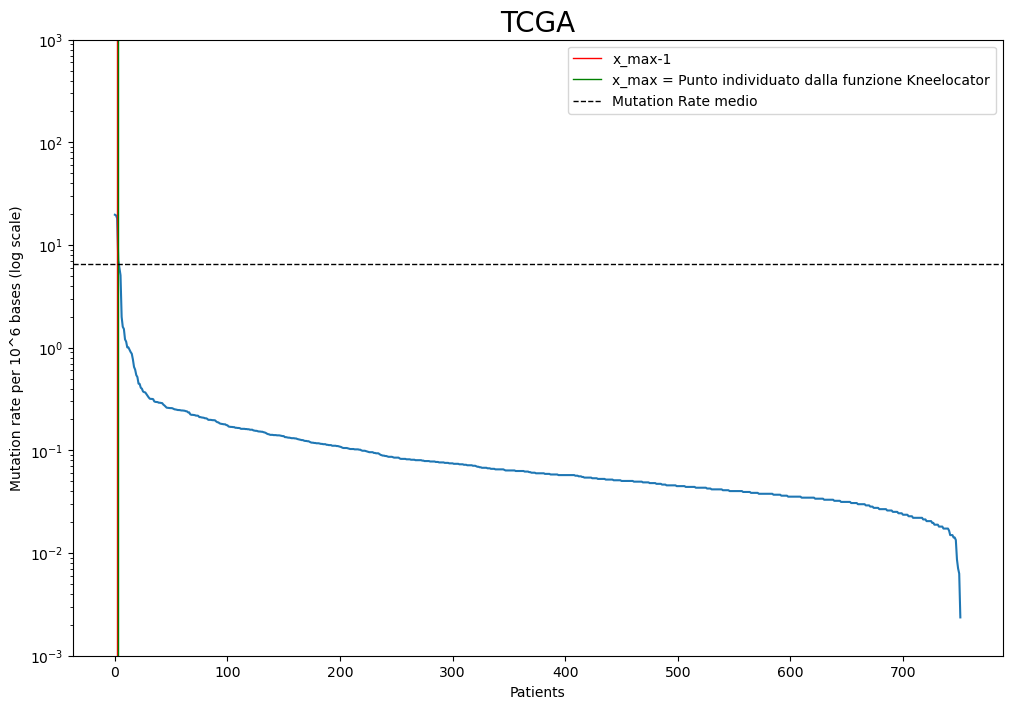

In [25]:
from kneed import KneeLocator, DataGenerator as dg

x_TCGA=patients_TOTAL_ductal
y_TCGA=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_TCGA, y_TCGA, S=0.1, curve="convex", direction="decreasing", online = True)
print(kl.knee)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_TCGA[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_TCGA[x3]
dim_inizio_x = 0
dim_finale_x = len(x_TCGA)
dim_inizio_y = 0
dim_finale_y = len(y_TCGA) 

print('dx_3:', x3)   
print('yx_3:', y3)   
print('dx_4:', x4)   
print('yx_4:', y4)   

gap_max_TCGA = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
print('gap_max', gap_max_TCGA) 
x_max_TCGA = x3

dim_finale_x = x3
print('dim_finale_x_sx:', dim_finale_x)   
dim_inizio_y = dim_finale_y - x3    # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali
print('dim_inizio_y_sx:', dim_inizio_y)   

x_sub = x_TCGA[0:dim_finale_x] 
y_sub = y_TCGA[0:x3] 
# x_sub e y_sub hanno la stessa lunghezza

print(x_sub)
print(y_sub)

while (dim_finale_x > 2): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    print(kl.knee)

    x4 = kl.knee
    y4 = y_TCGA[x4]
    x3 = kl.knee - 1
    y3 = y_TCGA[x3]

    print('dx_3:', x3)   
    print('yx_3:', y3)
    print('dx_4:', x4)
    print('yx_4:', y4)

    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 
    print('gap', gap)

    if gap > gap_max_TCGA: # aggiorna il gap massimo!!!
        gap_max_TCGA = gap
        print('gap_max:',gap_max_TCGA)
        x_max_TCGA = x4  # x4 > x3
        print('x:', x_max_TCGA)
    

    dim_finale_x = x3
    print('dim_finale_x:', dim_finale_x)
    dim_inizio_y = dim_finale_y - x3
    print('dim_inizio_y:', dim_inizio_y)

    x_sub = x_TCGA[0:dim_finale_x]
    y_sub = y_TCGA[0:x3]

    print(x_sub)
    print(y_sub)

y_max_TCGA_inf = array_mutation_rate_TOTAL_ductal[x_max_TCGA+1]
y_max_TCGA_sup = array_mutation_rate_TOTAL_ductal[x_max_TCGA]
y_max_TCGA_avg = (y_max_TCGA_inf + y_max_TCGA_sup)/2
y_grafico_media = (y_TCGA[x_max_TCGA]+y_TCGA[x_max_TCGA-1])/2
print('gap_max:',gap_max_TCGA)
print('x:',x_max_TCGA)
print('mutation rate inf:', y_max_TCGA_inf)
print('mutation rate sup:', y_max_TCGA_sup)
print('mutation rate avg:', y_max_TCGA_avg)
fig = plt.figure(figsize=(12, 8))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("TCGA",fontsize=20)
plt.axvline(x=x_max_TCGA-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_TCGA, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_TCGA_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend()
#set axes limit
plt.ylim(0.001, 1000)
plt.show()

#'Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap'
#df_soglia_iper = df_soglia_iper.append({'Studio': 'TCGA', 'x_max': x_max_TCGA, 'mutation rate x_max':y_max_TCGA_sup,  'x_max+1': x_max_TCGA+1, 'mutation_rate x_max+1': y_max_TCGA_inf,'gap': gap_max_TCGA }, ignore_index=True)

## ZOOM

(0.5179805098371477, 19.73757647894651)

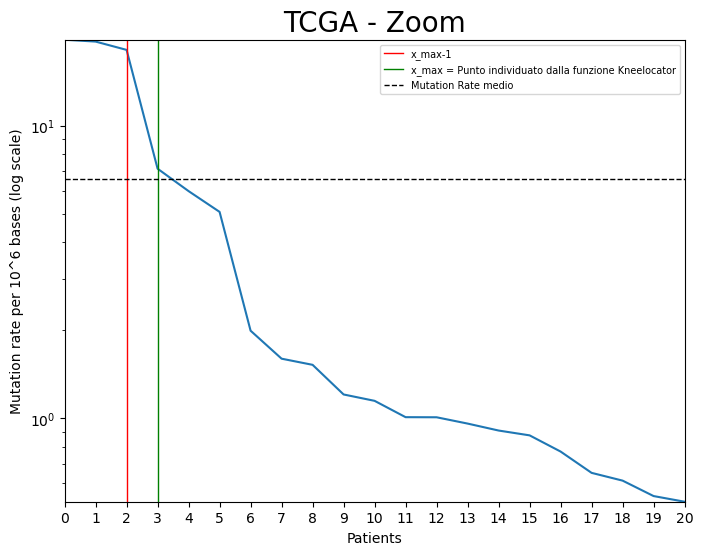

In [26]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xticks(np.arange(min(patients_TOTAL_ductal), max(patients_TOTAL_ductal)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("TCGA - Zoom",fontsize=20)
#plt.axvline(x=x_max_TCGA+1, color='red', linestyle='-')
x1_TCGA, y1_TCGA = (patients_TOTAL_ductal[0], patient_mutation_rate_TOTAL_ductal.loc[0, 'Mutation_rate*10^6'])
x2_TCGA, y2_TCGA = (patients_TOTAL_ductal[20], patient_mutation_rate_TOTAL_ductal.loc[20, 'Mutation_rate*10^6'])
plt.axvline(x=x_max_TCGA-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_TCGA, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_TCGA_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_TCGA, x2_TCGA)
plt.gca().set_ylim(y2_TCGA, y1_TCGA)

(0.1590152932934709, 19.73757647894651)

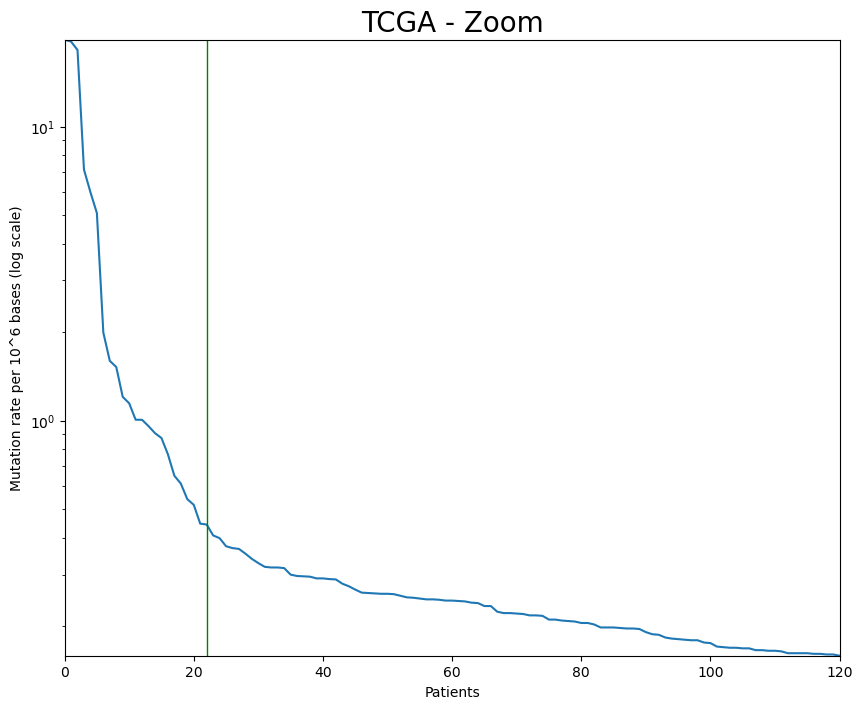

In [27]:
## MANUAL STUDY
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
#plt.xticks(np.arange(min(patients_TOTAL_ductal), max(patients_TOTAL_ductal)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("TCGA - Zoom",fontsize=20)
#plt.axvline(x=x_max_TCGA+1, color='red', linestyle='-')
x1_TCGA, y1_TCGA = (patients_TOTAL_ductal[0], patient_mutation_rate_TOTAL_ductal.loc[0, 'Mutation_rate*10^6'])
x2_TCGA, y2_TCGA = (patients_TOTAL_ductal[120], patient_mutation_rate_TOTAL_ductal.loc[120, 'Mutation_rate*10^6'])
#plt.axvline(x=x_max_TCGA-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=22, color='green', linestyle='-', linewidth = 1)
#plt.axhline(y=y_max_TCGA_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
#plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_TCGA, x2_TCGA)
plt.gca().set_ylim(y2_TCGA, y1_TCGA)

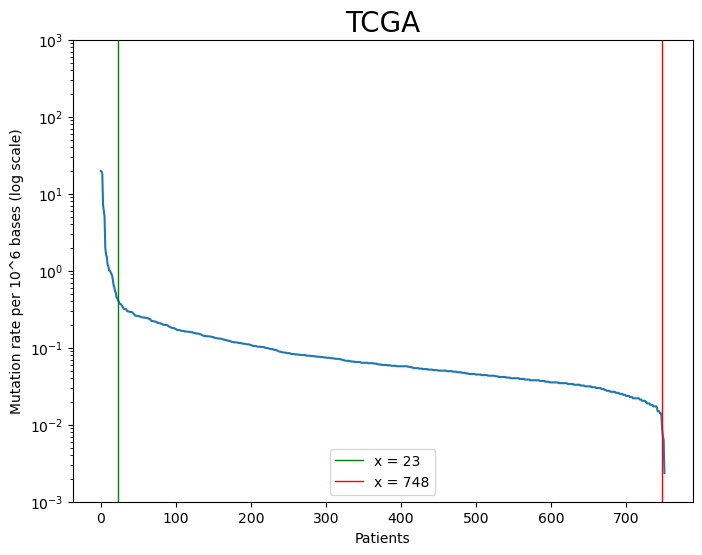

In [28]:
## MANUAL STUDY 
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
# soglia ipermutati
plt.axvline(x=23, color='green', linestyle='-', linewidth = 1, label='x = 23')
# soglia ipomutati
plt.axvline(x=748, color='red', linestyle='-', linewidth = 1, label='x = 748')
plt.title ("TCGA",fontsize=20)
plt.legend()
plt.show()

In [29]:
# create a table containing the iterated values: x3, y3, x4, y4, gap. For each row, one iteration.

x_TCGA=patients_TOTAL_ductal
y_TCGA=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_TCGA, y_TCGA, S=0.1, curve="convex", direction="decreasing", online = True)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_TCGA[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_TCGA[x3]
dim_inizio_x = 0
dim_finale_x = len(x_TCGA) #164
dim_inizio_y = 0
dim_finale_y = len(x_TCGA) #164

gap_TCGA = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
x_max_TCGA = x3

data = [[x4, y4, x3, y3, gap_TCGA]] # inizializzo data con il primo risultato di Kneelocator

dim_finale_x = x3
dim_inizio_y = dim_finale_y - x3 # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali

x_sub = x_TCGA[0:dim_finale_x] # da 0 a 156 --> 156 = lunghezza del vettore
y_sub = y_TCGA[0:x3] # da 8 a 164 --> 156 = lunghezza del vettore
# x_sub e y_sub hanno la stessa lunghezza

while (dim_finale_x > 2): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    
    x4 = kl.knee
    y4 = y_TCGA[x4]
    x3 = kl.knee - 1
    y3 = y_TCGA[x3]
    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 

    data.append([x4, y4, x3, y3, gap])
  
    dim_finale_x = x3
    dim_inizio_y = dim_finale_y - x3
    dim_finale_y = x3
   
    x_sub = x_TCGA[0:x3]
    y_sub = y_TCGA[0:x3]
    
cols=['x4','y4','x3','y3','gap']
result_KneeLocator = pd.DataFrame(data, columns=cols)  
result_KneeLocator

,x4,y4,x3,y3,gap
0,745,-1.848640,744,-1.825159,0.023481
1,742,-1.825159,741,-1.781693,0.043466
2,736,-1.761490,735,-1.742185,0.019305
3,732,-1.742185,731,-1.723701,0.018483
4,728,-1.723701,727,-1.705972,0.017729
5,721,-1.688939,720,-1.672549,0.016390
6,718,-1.672549,717,-1.656754,0.015794
7,709,-1.656754,708,-1.641514,0.015240
8,705,-1.641514,704,-1.626791,0.014723
9,700,-1.626791,699,-1.612551,0.014240


In [30]:
# save the dataset 
result_KneeLocator.to_csv('Points_foundbyKneeLocator_TCGA.csv', index=False, sep=',')

### Eliminating the 3 hypermutated patients from the dataset according to the threshold found by KneeLocator

In [31]:
# delete rows associated to TCGA-BH-A18V patient
data_mutation_without_hypermutated = data_mutation_TOTAL_ductal[data_mutation_TOTAL_ductal.PATIENT_ID != 'TCGA-BH-A18V']

In [32]:
# delete rows associated to TCGA-A2-A0EV patient
data_mutation_without_hypermutated = data_mutation_without_hypermutated[data_mutation_without_hypermutated.PATIENT_ID != 'TCGA-A2-A0EV']

In [33]:
# delete rows associated to TCGA-AC-A8OP patient
data_mutation_without_hypermutated = data_mutation_without_hypermutated[data_mutation_without_hypermutated.PATIENT_ID != 'TCGA-AC-A8OP']

In [34]:
# save the mutation dataset containing only non-hypermutated patients
data_mutation_without_hypermutated.to_csv('mutation_table_TCGA_total_ductal_without_hypermutated.csv')

### Mutation Frequency analysis

In [35]:
genes_patients_TOTAL_ductal=data_mutation_TOTAL_ductal[['PATIENT_ID', 'Hugo_Symbol']]

In [36]:
genes_patients_TOTAL_ductal=genes_patients_TOTAL_ductal.drop_duplicates()

In [37]:
n_of_pts_per_gene_TOTAL_ductal= genes_patients_TOTAL_ductal.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_TOTAL_ductal.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [38]:
tot_pts_TOTAL_ductal = 752 

In [39]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_TOTAL_ductal["Mutation_frequency (%)"] = (n_of_pts_per_gene_TOTAL_ductal["Num_pts_per_gene"]*100)/tot_pts_TOTAL_ductal

In [40]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_TOTAL_ductal= n_of_pts_per_gene_TOTAL_ductal.sort_values(by="Num_pts_per_gene", ascending=False)

In [41]:
gene_mutation_frequency_TOTAL_ductal = n_of_pts_per_gene_TOTAL_ductal[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [42]:
# select the first 50 genes
highest_mutated_genes_TOTAL_ductal=gene_mutation_frequency_TOTAL_ductal.head(50)

In [43]:
mutated_gene_names=highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'].tolist()

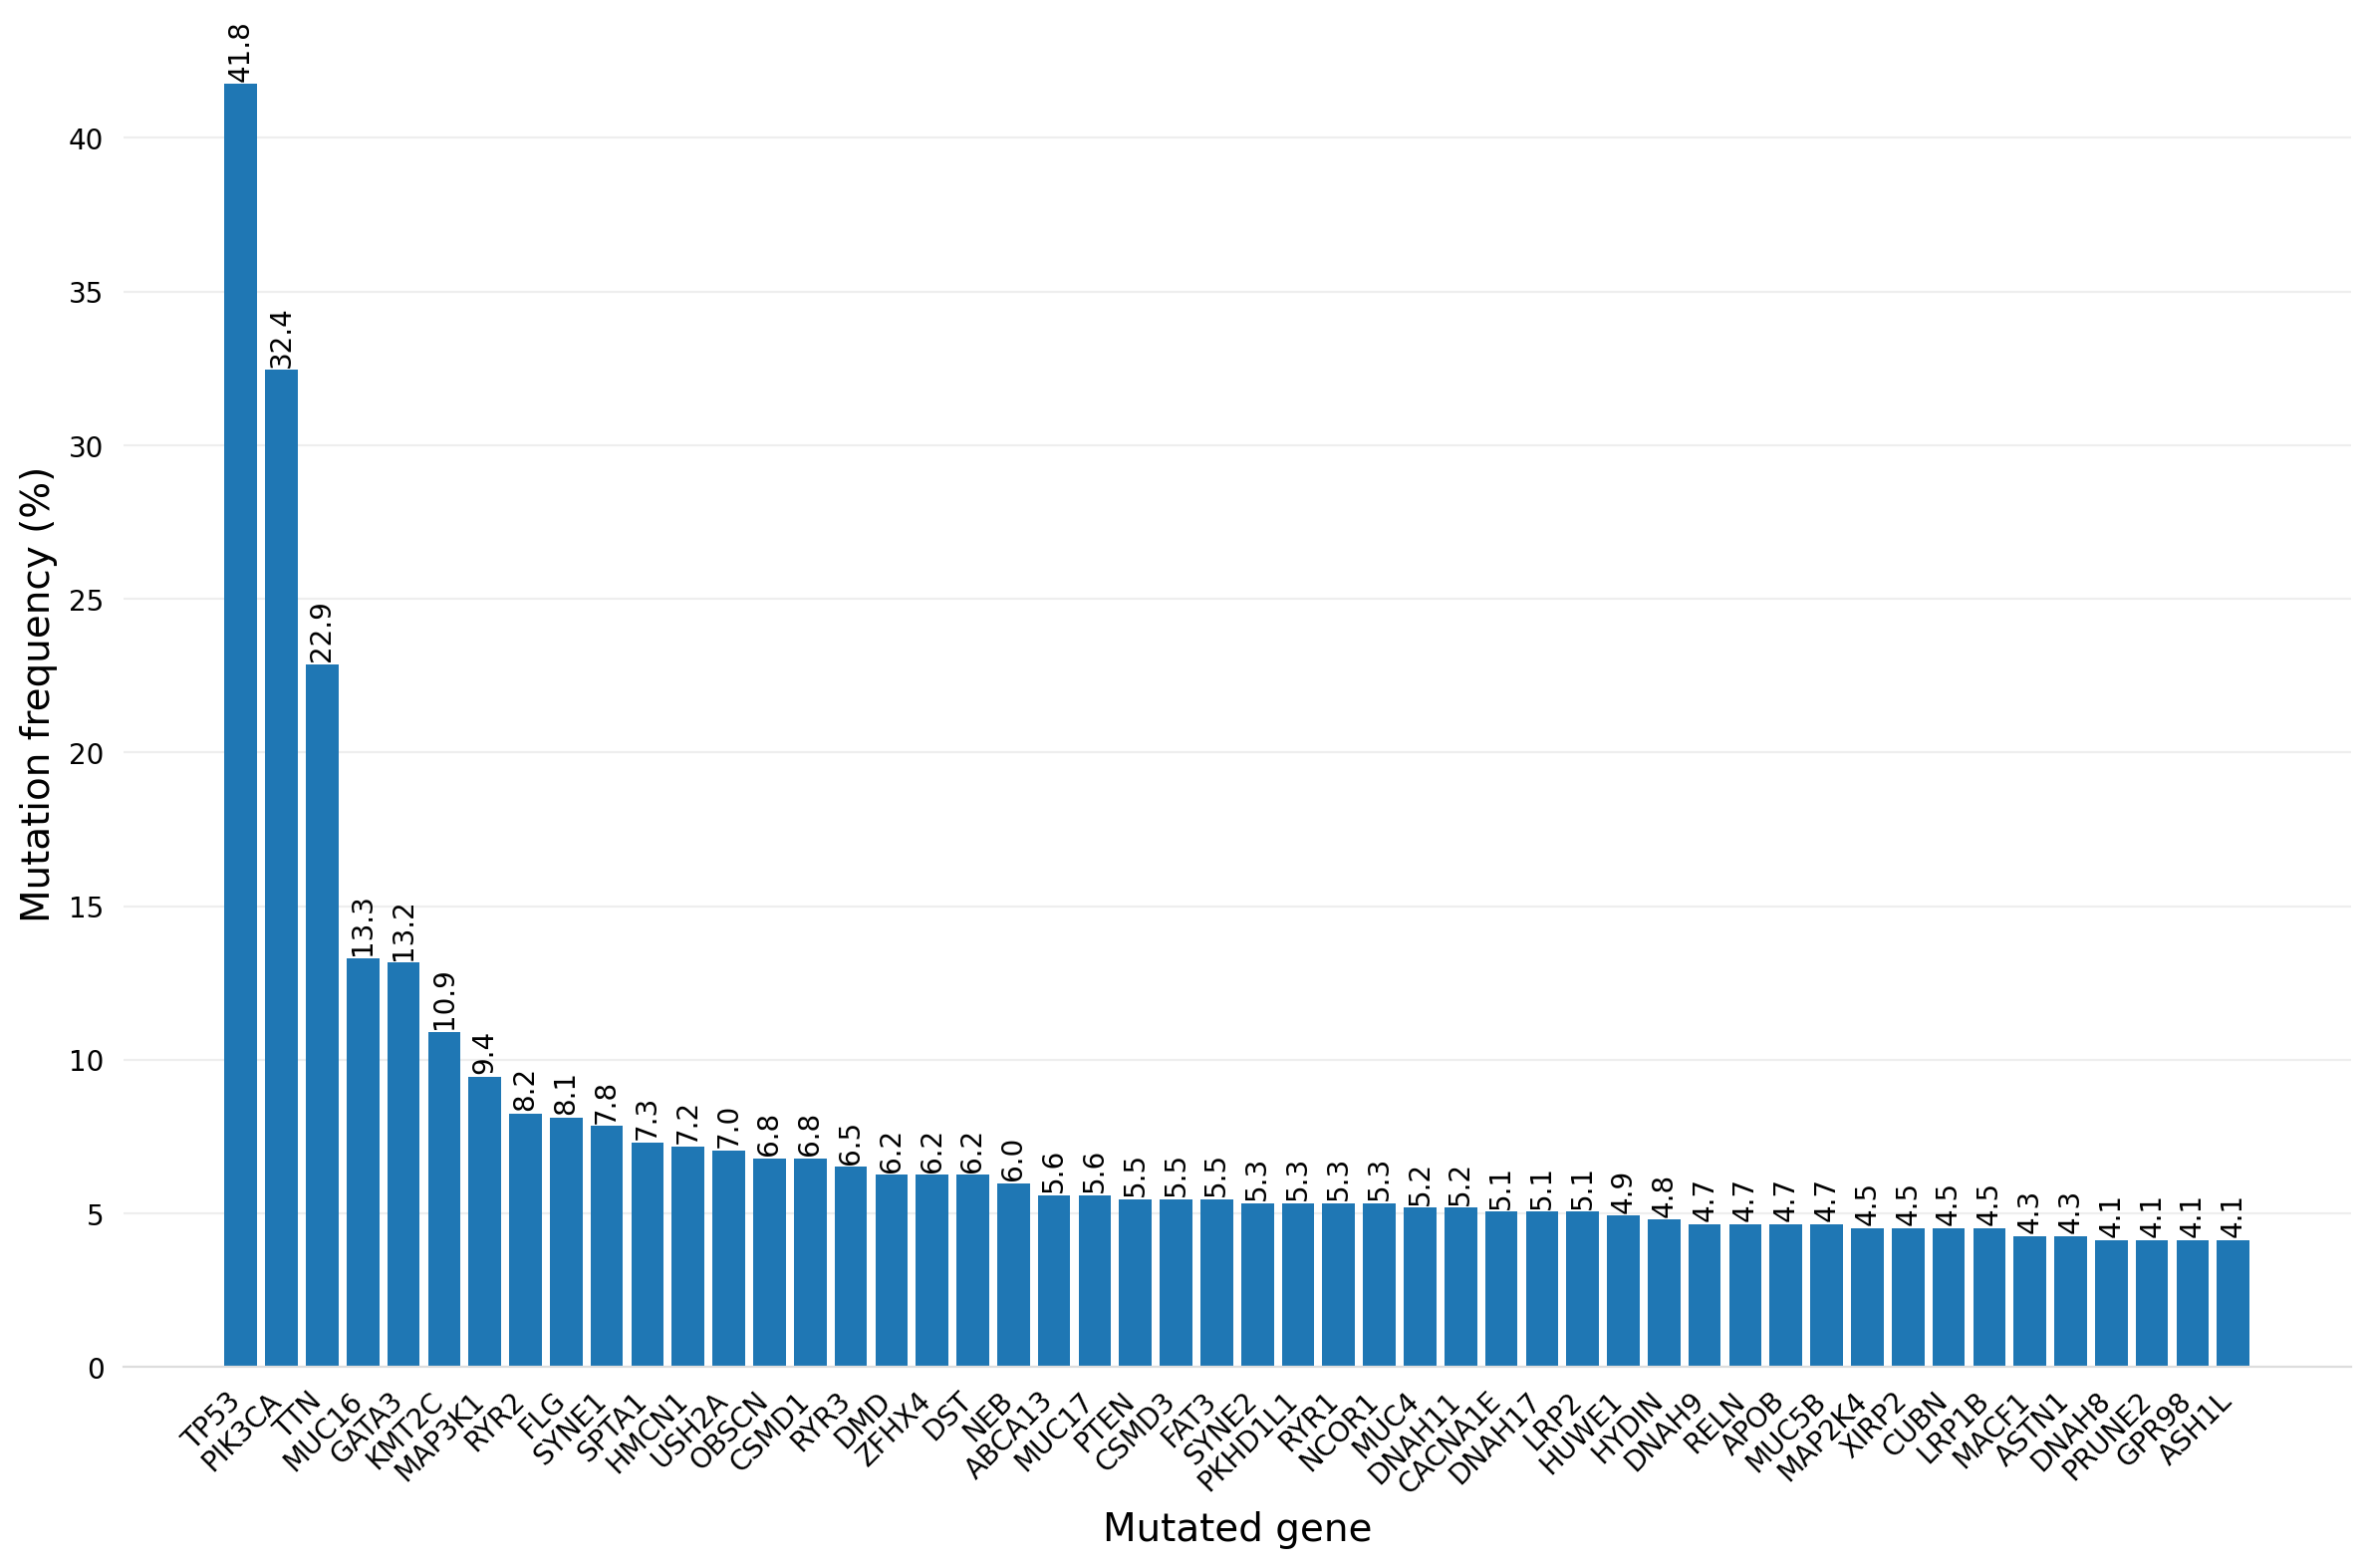

In [44]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'], highest_mutated_genes_TOTAL_ductal['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL and BASAL

In [45]:
data_mutation_ductal_TN=pd.read_csv('mutation_table_TCGA_PanCancer2018_basal_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_TN = data_mutation_ductal_TN.iloc[:, 1:]
data_mutation_ductal_TN

,PATIENT_ID,Target,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Gene_length,ENSP
0,TCGA-A1-A0SO,1,TCGA-A1-A0SO-01,XPNPEP1,10,111642335.0,111642335.0,Missense_Mutation,SNP,C,C,A,ENST00000502935.1:c.896G>T,p.G299V,299.0,58788,ENSP00000421566
1,TCGA-A1-A0SO,1,TCGA-A1-A0SO-01,PDCD4,10,112640989.0,112640989.0,Splice_Site,SNP,A,A,C,ENST00000280154.7:c.44-2A>C,p.X15_splice,15.0,28200,ENSP00000280154
2,TCGA-A1-A0SO,1,TCGA-A1-A0SO-01,HSPA14,10,14880518.0,14880518.0,Intron,SNP,G,G,T,ENST00000378372.3:c.57+60G>T,p.*19*,NaN,33578,ENSP00000419395
3,TCGA-A1-A0SO,1,TCGA-A1-A0SO-01,SPAG6,10,22675859.0,22675859.0,Missense_Mutation,SNP,A,A,G,ENST00000376624.3:c.649A>G,p.M217V,217.0,108755,ENSP00000365811
4,TCGA-A1-A0SO,1,TCGA-A1-A0SO-01,GPR158,10,25755604.0,25755604.0,Missense_Mutation,SNP,C,C,A,ENST00000376351.3:c.1360C>A,p.L454M,454.0,427165,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23316,TCGA-S3-AA15,1,TCGA-S3-AA15-01,KCNMB2,3,178561923.0,178561923.0,3'UTR,SNP,G,G,C,NaN,NaN,NaN,571498,ENSP00000407592
23317,TCGA-S3-AA15,1,TCGA-S3-AA15-01,TMEM110,3,52874374.0,52874374.0,3'UTR,SNP,G,G,C,NaN,NaN,NaN,61378,ENSP00000347195
23318,TCGA-S3-AA15,1,TCGA-S3-AA15-01,CSF2,5,131411805.0,131411805.0,3'UTR,SNP,C,C,G,NaN,NaN,NaN,2377,ENSP00000296871
23319,TCGA-S3-AA15,1,TCGA-S3-AA15-01,SNRPC,6,34741470.0,34741470.0,3'UTR,SNP,G,G,A,NaN,NaN,NaN,16389,ENSP00000244520


### Eliminating the one hypermutated patient from the basal ductal mutation dataset

In [46]:
# delete rows associated to TCGA-BH-A18V patient
data_mutation_ductal_TN_without_hypermutated = data_mutation_ductal_TN[data_mutation_ductal_TN.PATIENT_ID != 'TCGA-BH-A18V']

In [47]:
# save the dataset 
data_mutation_ductal_TN_without_hypermutated.to_csv('mutation_table_TCGA_ductal_and_TN_without_hypermutated.csv')

In [48]:
# check if there are duplicate rows 
data_mutation_ductal_TN.duplicated().sum()

0

### Mutation Frequency analysis

In [49]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_TN['End_Position']-data_mutation_ductal_TN['Start_Position']+1

In [50]:
data_mutation_ductal_TN['PATIENT_ID'].nunique()

153

In [51]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_TN = data_mutation_ductal_TN[['PATIENT_ID', 'Mutation_length']]

In [52]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_TN_group_by_pts=pts_mutation_length_ductal_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [53]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_TN = data_mutation_ductal_TN[['Hugo_Symbol', 'Gene_length']]

In [54]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_TN['Hugo_Symbol'].nunique()

11468

In [55]:
# group by gene (Hugo_Symbol) 
mutation_ductal_TN_group_by_gene=gene_length_for_each_mutation_ductal_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [56]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_TN = mutation_ductal_TN_group_by_gene['Gene_length'].sum()

In [57]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_TN_group_by_pts["Mutation_rate"] = mutation_ductal_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_TN

In [58]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_TN_group_by_pts["Mutation_rate"]*1000000

In [59]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_TN_group_by_pts= mutation_ductal_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [60]:
patient_mutation_rate_ductal_TN=mutation_ductal_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [61]:
patients=np.arange(0,153,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

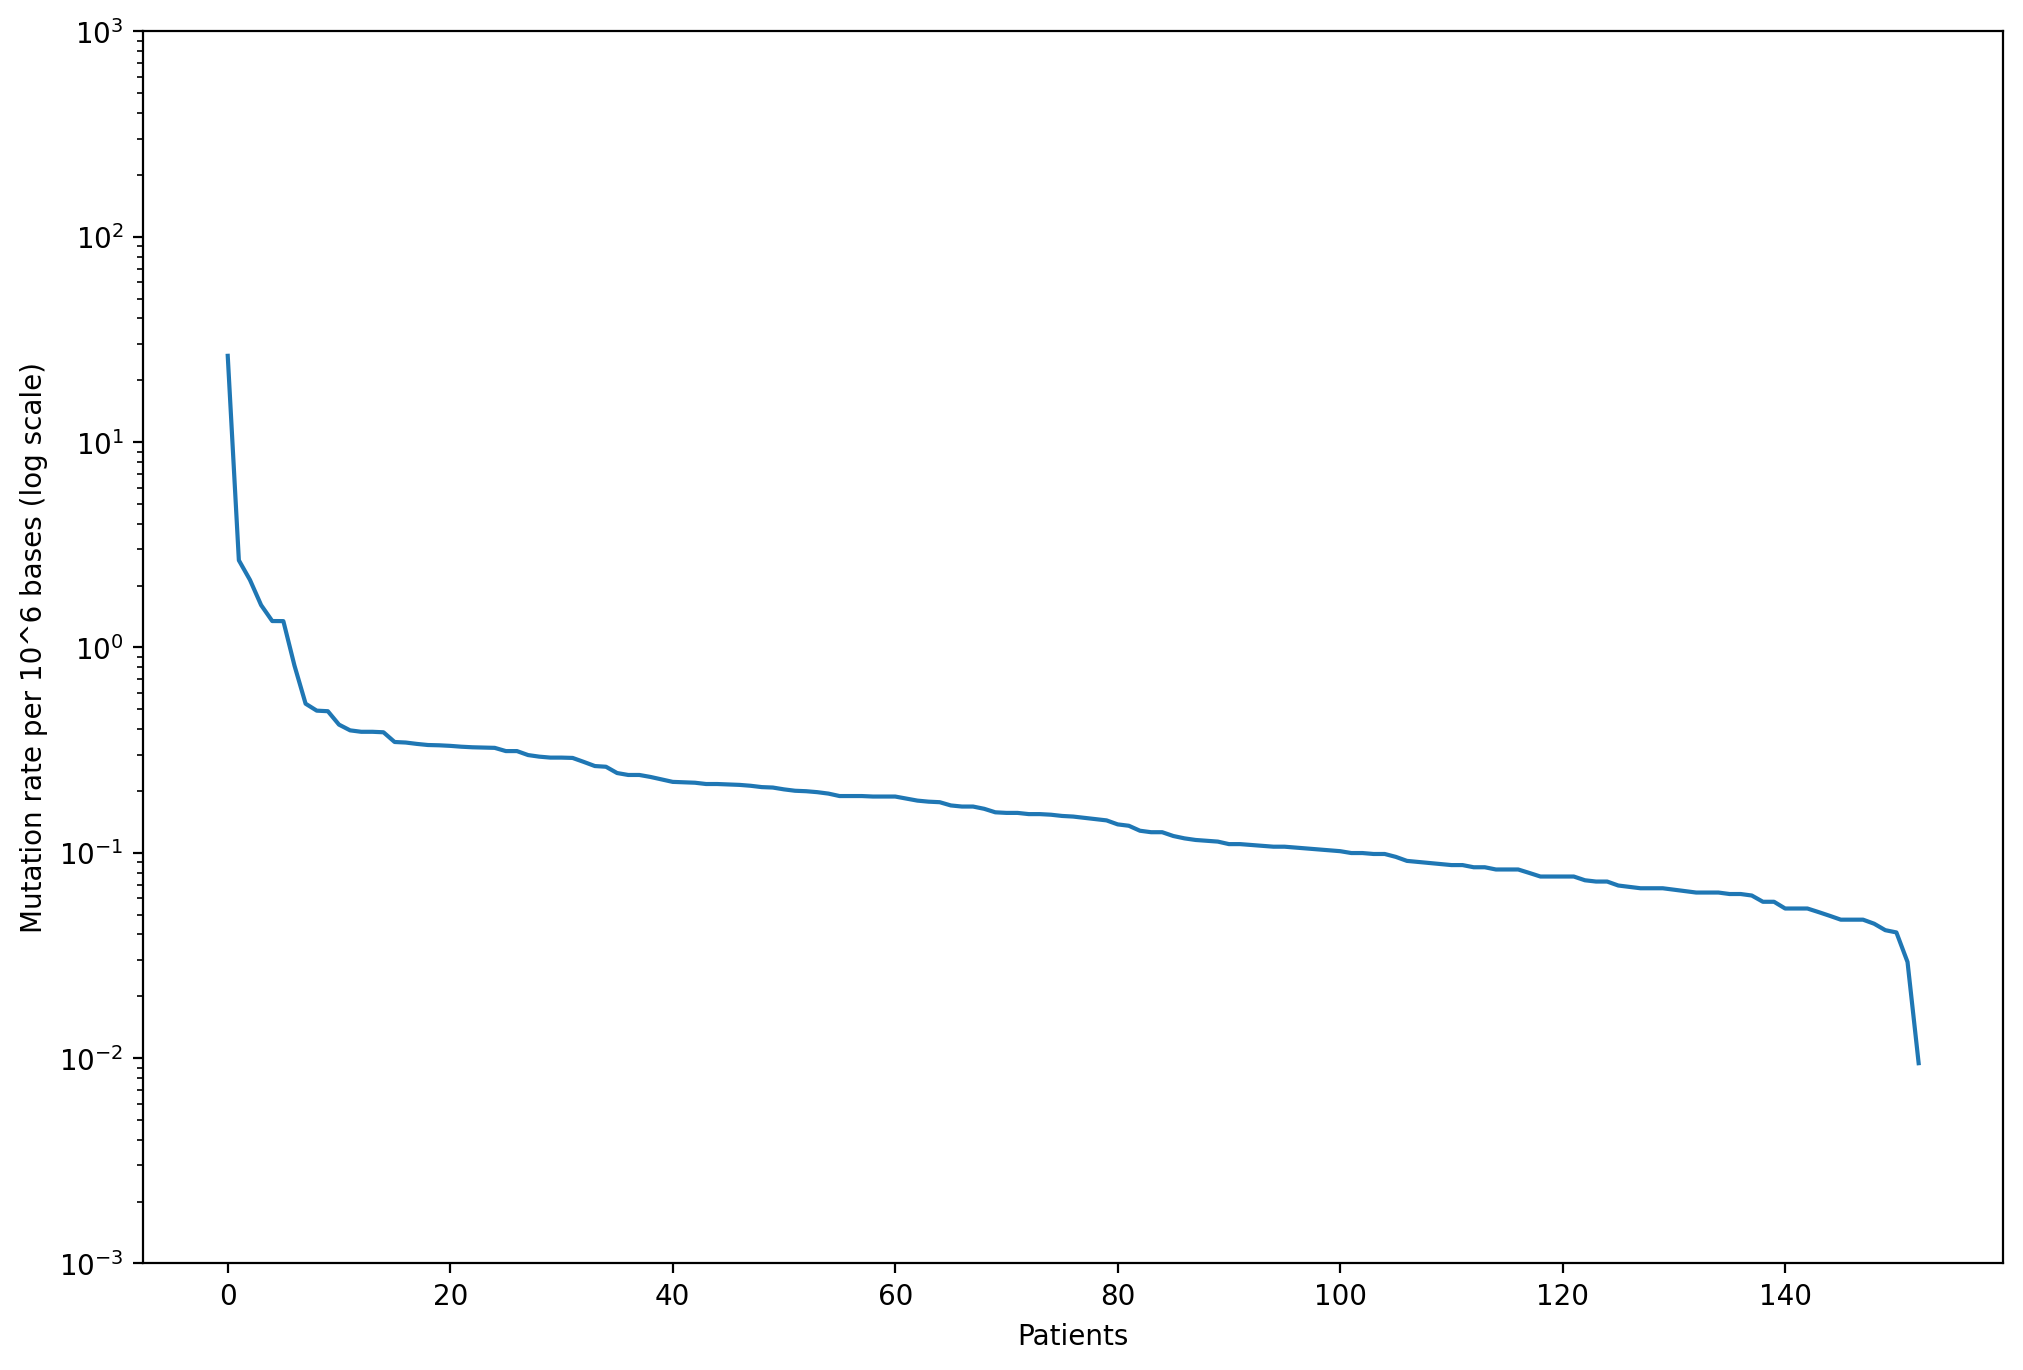

In [62]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [63]:
genes_patients_ductal_TN=data_mutation_ductal_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [64]:
genes_patients_ductal_TN=genes_patients_ductal_TN.drop_duplicates()

In [65]:
n_of_pts_per_gene_ductal_TN= genes_patients_ductal_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [66]:
tot_pts_ductal_TN = 153

In [67]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_TN

In [68]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_TN= n_of_pts_per_gene_ductal_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [69]:
gene_mutation_frequency_ductal_TN = n_of_pts_per_gene_ductal_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [70]:
# select the first 50 genes
highest_mutated_genes_ductal_TN=gene_mutation_frequency_ductal_TN.head(50)

In [71]:
mutated_gene_names=highest_mutated_genes_ductal_TN['Hugo_Symbol'].tolist()

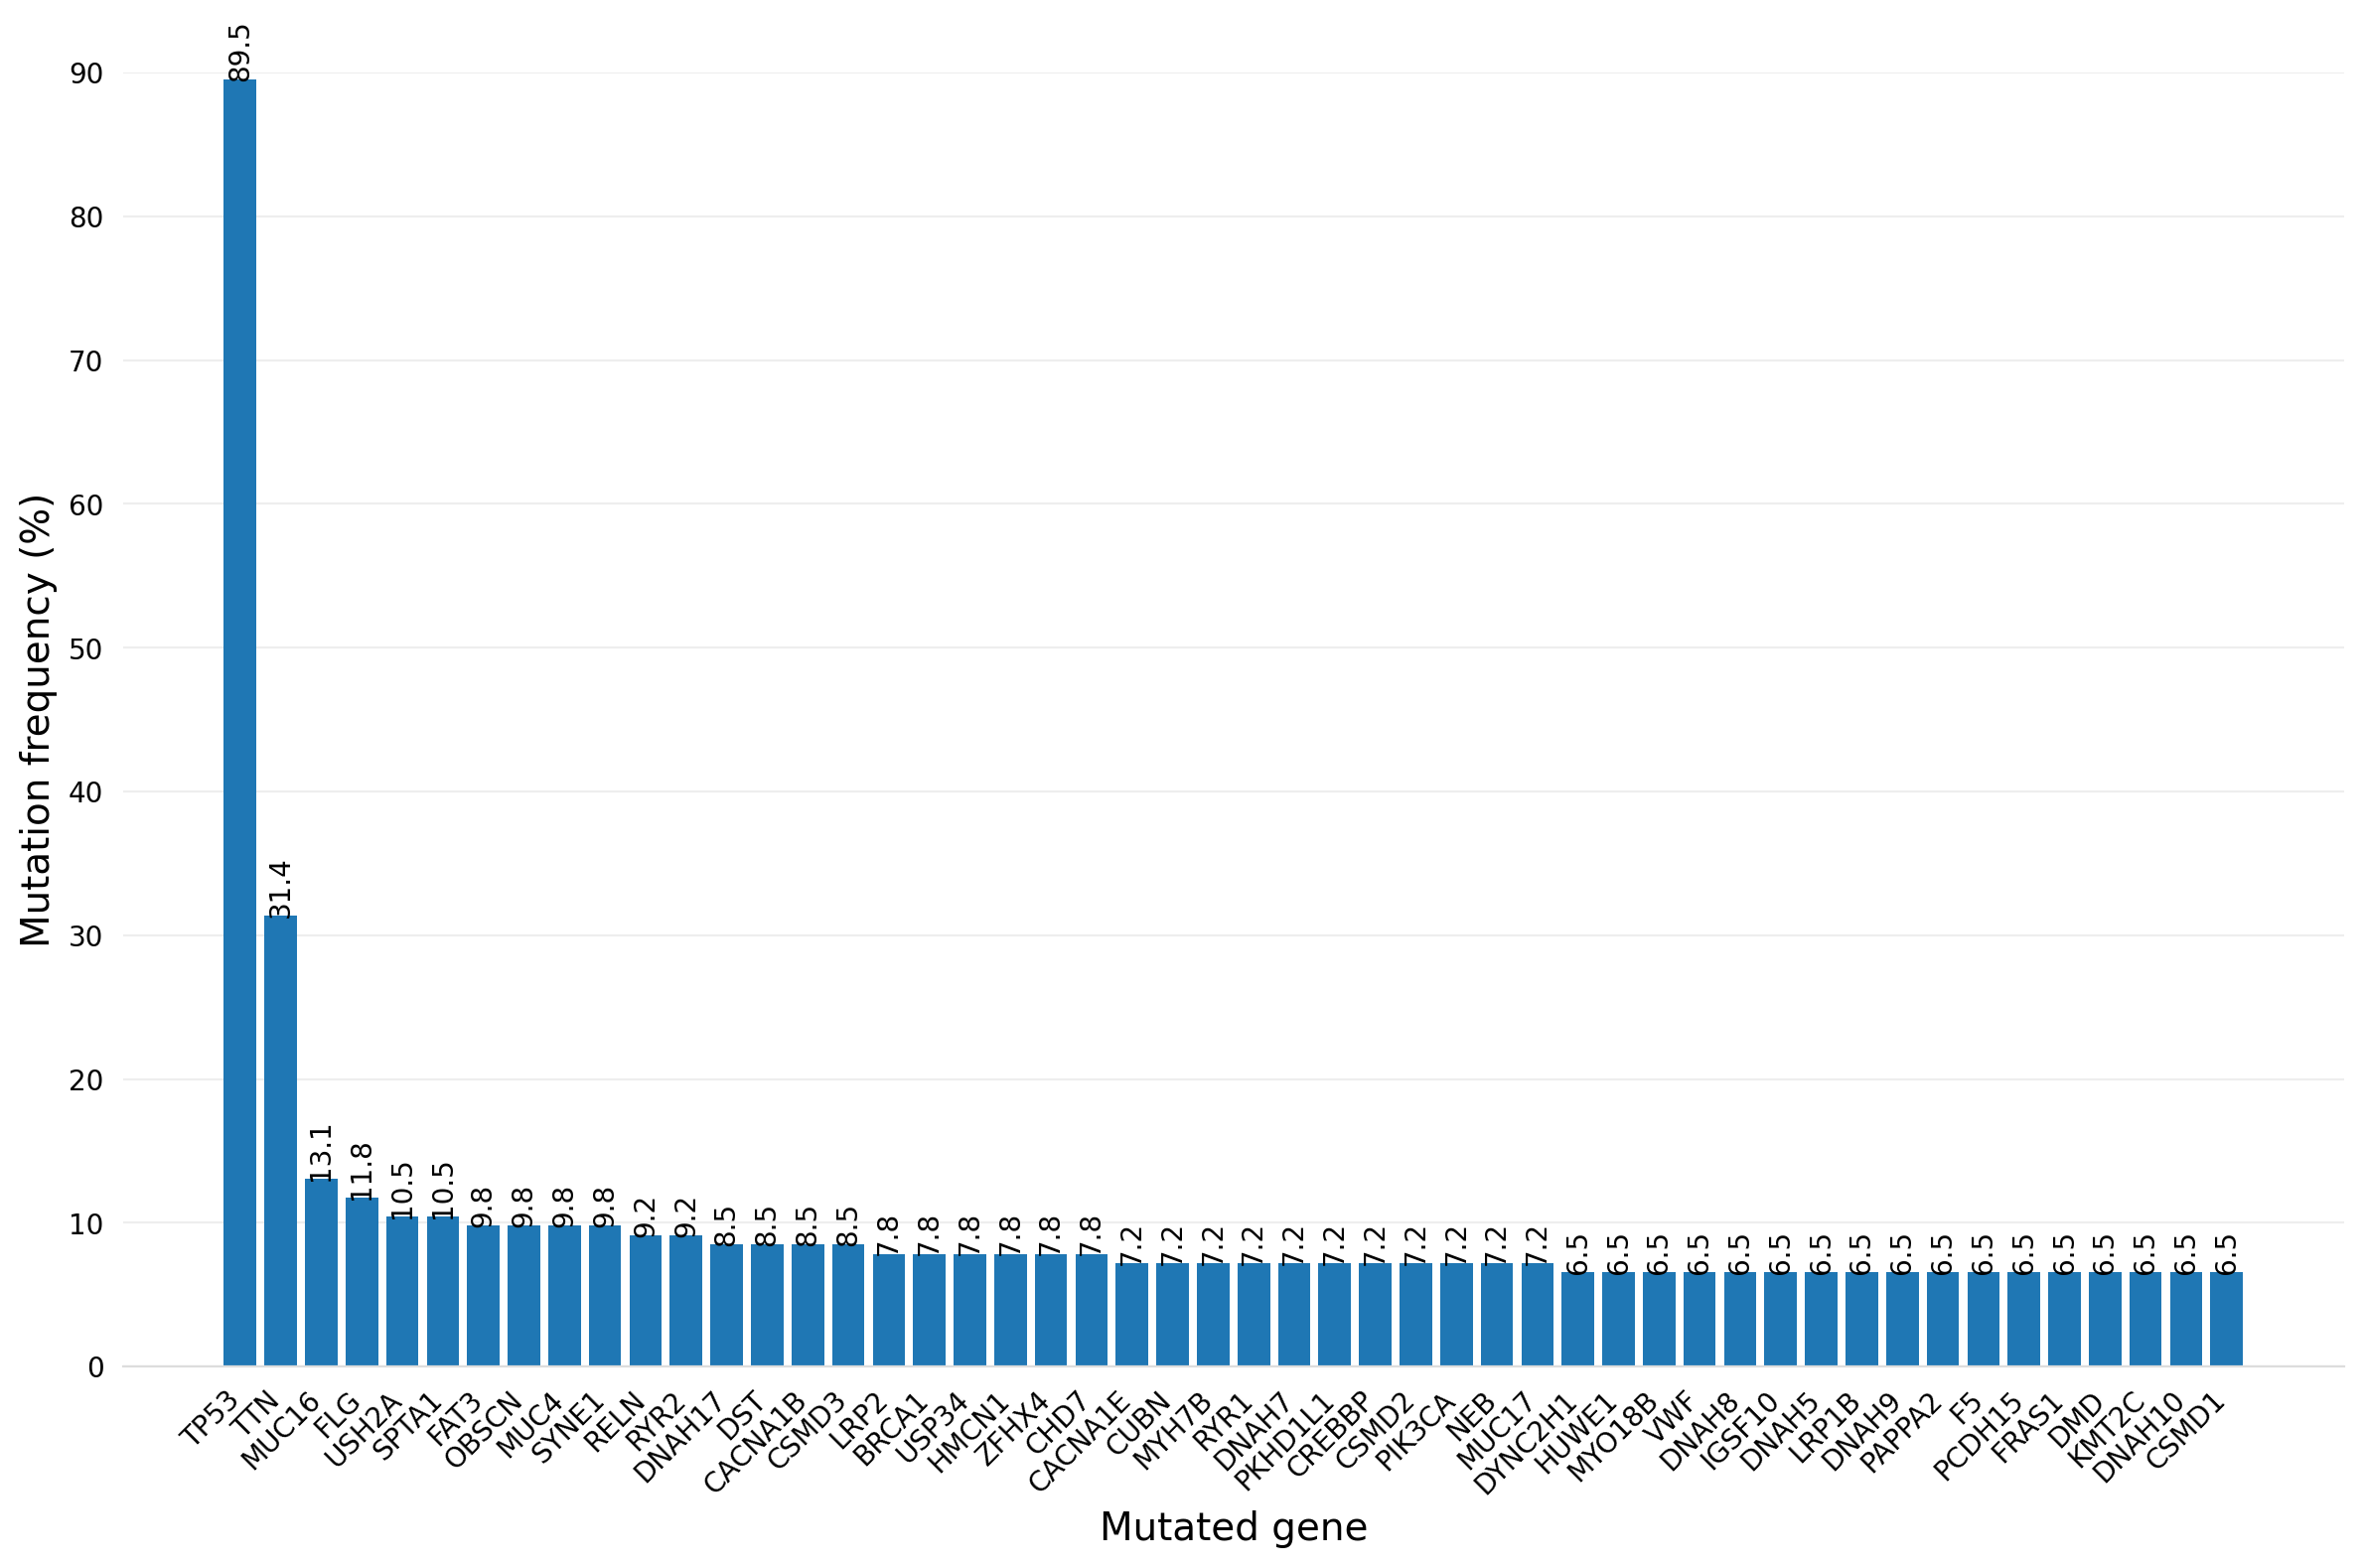

In [72]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_TN['Hugo_Symbol'], highest_mutated_genes_ductal_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 90)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL NON BASAL 

In [73]:
data_mutation_ductal_NON_TN=pd.read_csv('mutation_table_TCGA_PanCancer2018_NON_basal_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN.iloc[:, 1:]
data_mutation_ductal_NON_TN

,PATIENT_ID,Target,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Gene_length,ENSP
0,TCGA-A1-A0SO,1.0,TCGA-A1-A0SO-01,XPNPEP1,10,111642335.0,111642335.0,Missense_Mutation,SNP,C,C,A,ENST00000502935.1:c.896G>T,p.G299V,299.0,58788,ENSP00000421566
1,TCGA-A1-A0SO,1.0,TCGA-A1-A0SO-01,PDCD4,10,112640989.0,112640989.0,Splice_Site,SNP,A,A,C,ENST00000280154.7:c.44-2A>C,p.X15_splice,15.0,28200,ENSP00000280154
2,TCGA-A1-A0SO,1.0,TCGA-A1-A0SO-01,HSPA14,10,14880518.0,14880518.0,Intron,SNP,G,G,T,ENST00000378372.3:c.57+60G>T,p.*19*,NaN,33578,ENSP00000419395
3,TCGA-A1-A0SO,1.0,TCGA-A1-A0SO-01,SPAG6,10,22675859.0,22675859.0,Missense_Mutation,SNP,A,A,G,ENST00000376624.3:c.649A>G,p.M217V,217.0,108755,ENSP00000365811
4,TCGA-A1-A0SO,1.0,TCGA-A1-A0SO-01,GPR158,10,25755604.0,25755604.0,Missense_Mutation,SNP,C,C,A,ENST00000376351.3:c.1360C>A,p.L454M,454.0,427165,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117800,TCGA-WT-AB41,NaN,TCGA-WT-AB41-01,ALPPL2,2,233274646.0,233274646.0,3'UTR,SNP,G,G,A,NaN,NaN,NaN,3872,ENSP00000295453
117801,TCGA-WT-AB41,NaN,TCGA-WT-AB41-01,ASAP2,2,9545025.0,9545025.0,3'UTR,SNP,A,A,T,NaN,NaN,NaN,198919,ENSP00000353850
117802,TCGA-WT-AB41,NaN,TCGA-WT-AB41-01,ECE2,3,184010274.0,184010274.0,3'UTR,SNP,A,A,G,NaN,NaN,NaN,43382,ENSP00000384223
117803,TCGA-WT-AB41,NaN,TCGA-WT-AB41-01,KCNH8,3,19575954.0,19575954.0,3'UTR,SNP,C,C,T,NaN,NaN,NaN,387193,ENSP00000328813


### Eliminating the two hypermutated patients from the non basal ductal mutation dataset

In [74]:
# delete rows associated to TCGA-A2-A0EV patient
data_mutation_ductal_NON_TN_without_hypermutated = data_mutation_ductal_NON_TN[data_mutation_ductal_NON_TN.PATIENT_ID != 'TCGA-A2-A0EV']

In [75]:
# delete rows associated to TCGA-AC-A8OP patient
data_mutation_ductal_NON_TN_without_hypermutated = data_mutation_ductal_NON_TN_without_hypermutated[data_mutation_ductal_NON_TN_without_hypermutated.PATIENT_ID != 'TCGA-AC-A8OP']

In [76]:
# save the dataset
data_mutation_ductal_NON_TN_without_hypermutated.to_csv('mutation_table_TCGA_ductal_and_NONTN_without_hypermutated.csv')

In [77]:
# check if there are duplicate rows 
data_mutation_ductal_NON_TN.duplicated().sum()

0

In [78]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_NON_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_NON_TN['End_Position']-data_mutation_ductal_NON_TN['Start_Position']+1

In [79]:
data_mutation_ductal_NON_TN['PATIENT_ID'].nunique()

752

In [80]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_NON_TN = data_mutation_ductal_NON_TN[['PATIENT_ID', 'Mutation_length']]

In [81]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_NON_TN_group_by_pts=pts_mutation_length_ductal_NON_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_NON_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [82]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN[['Hugo_Symbol', 'Gene_length']]

In [83]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_NON_TN['Hugo_Symbol'].nunique()

18054

In the dataset there are 16903 distinct genes. 

In [84]:
# group by gene (Hugo_Symbol) 
mutation_ductal_NON_TN_group_by_gene=gene_length_for_each_mutation_ductal_NON_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [85]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_NON_TN = mutation_ductal_NON_TN_group_by_gene['Gene_length'].sum()

In [86]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_NON_TN_group_by_pts["Mutation_rate"] = mutation_ductal_NON_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_NON_TN

In [87]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_NON_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_NON_TN_group_by_pts["Mutation_rate"]*1000000

In [88]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_NON_TN_group_by_pts= mutation_ductal_NON_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [89]:
patient_mutation_rate_ductal_NON_TN=mutation_ductal_NON_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [90]:
patients=np.arange(0,752,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_NON_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

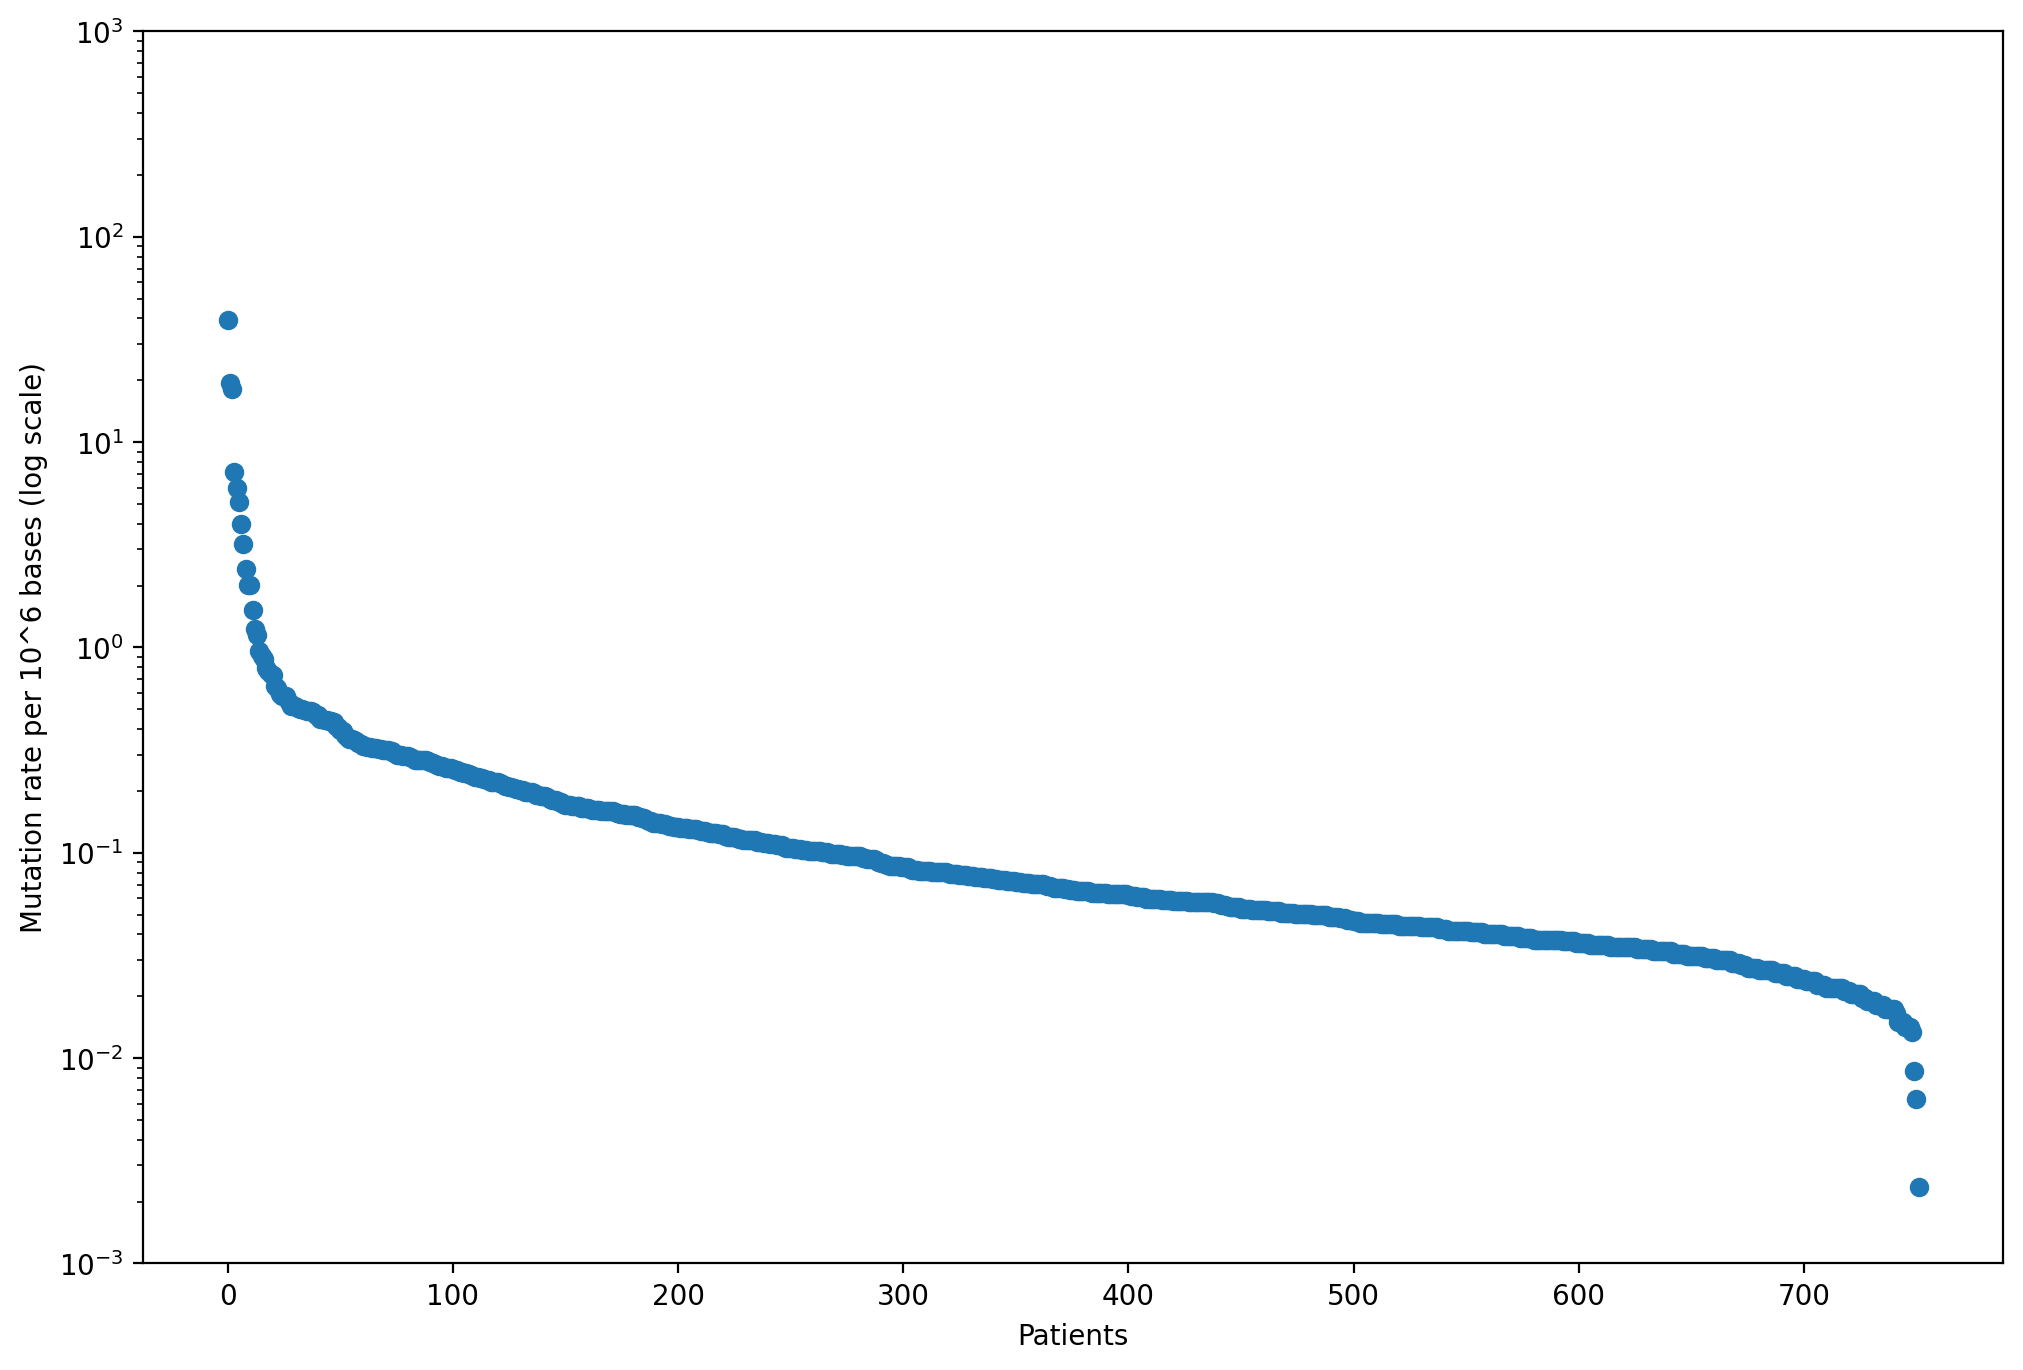

In [91]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

In [92]:
genes_patients_ductal_NON_TN=data_mutation_ductal_NON_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [93]:
genes_patients_ductal_NON_TN=genes_patients_ductal_NON_TN.drop_duplicates()

In [94]:
n_of_pts_per_gene_ductal_NON_TN= genes_patients_ductal_NON_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_NON_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [95]:
tot_pts_ductal_NON_TN = 599

In [96]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_NON_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_NON_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_NON_TN

In [97]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_NON_TN= n_of_pts_per_gene_ductal_NON_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [98]:
gene_mutation_frequency_ductal_NON_TN = n_of_pts_per_gene_ductal_NON_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [99]:
# select the first 50 genes
highest_mutated_genes_ductal_NON_TN=gene_mutation_frequency_ductal_NON_TN.head(50)

In [100]:
mutated_gene_names=highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'].tolist()

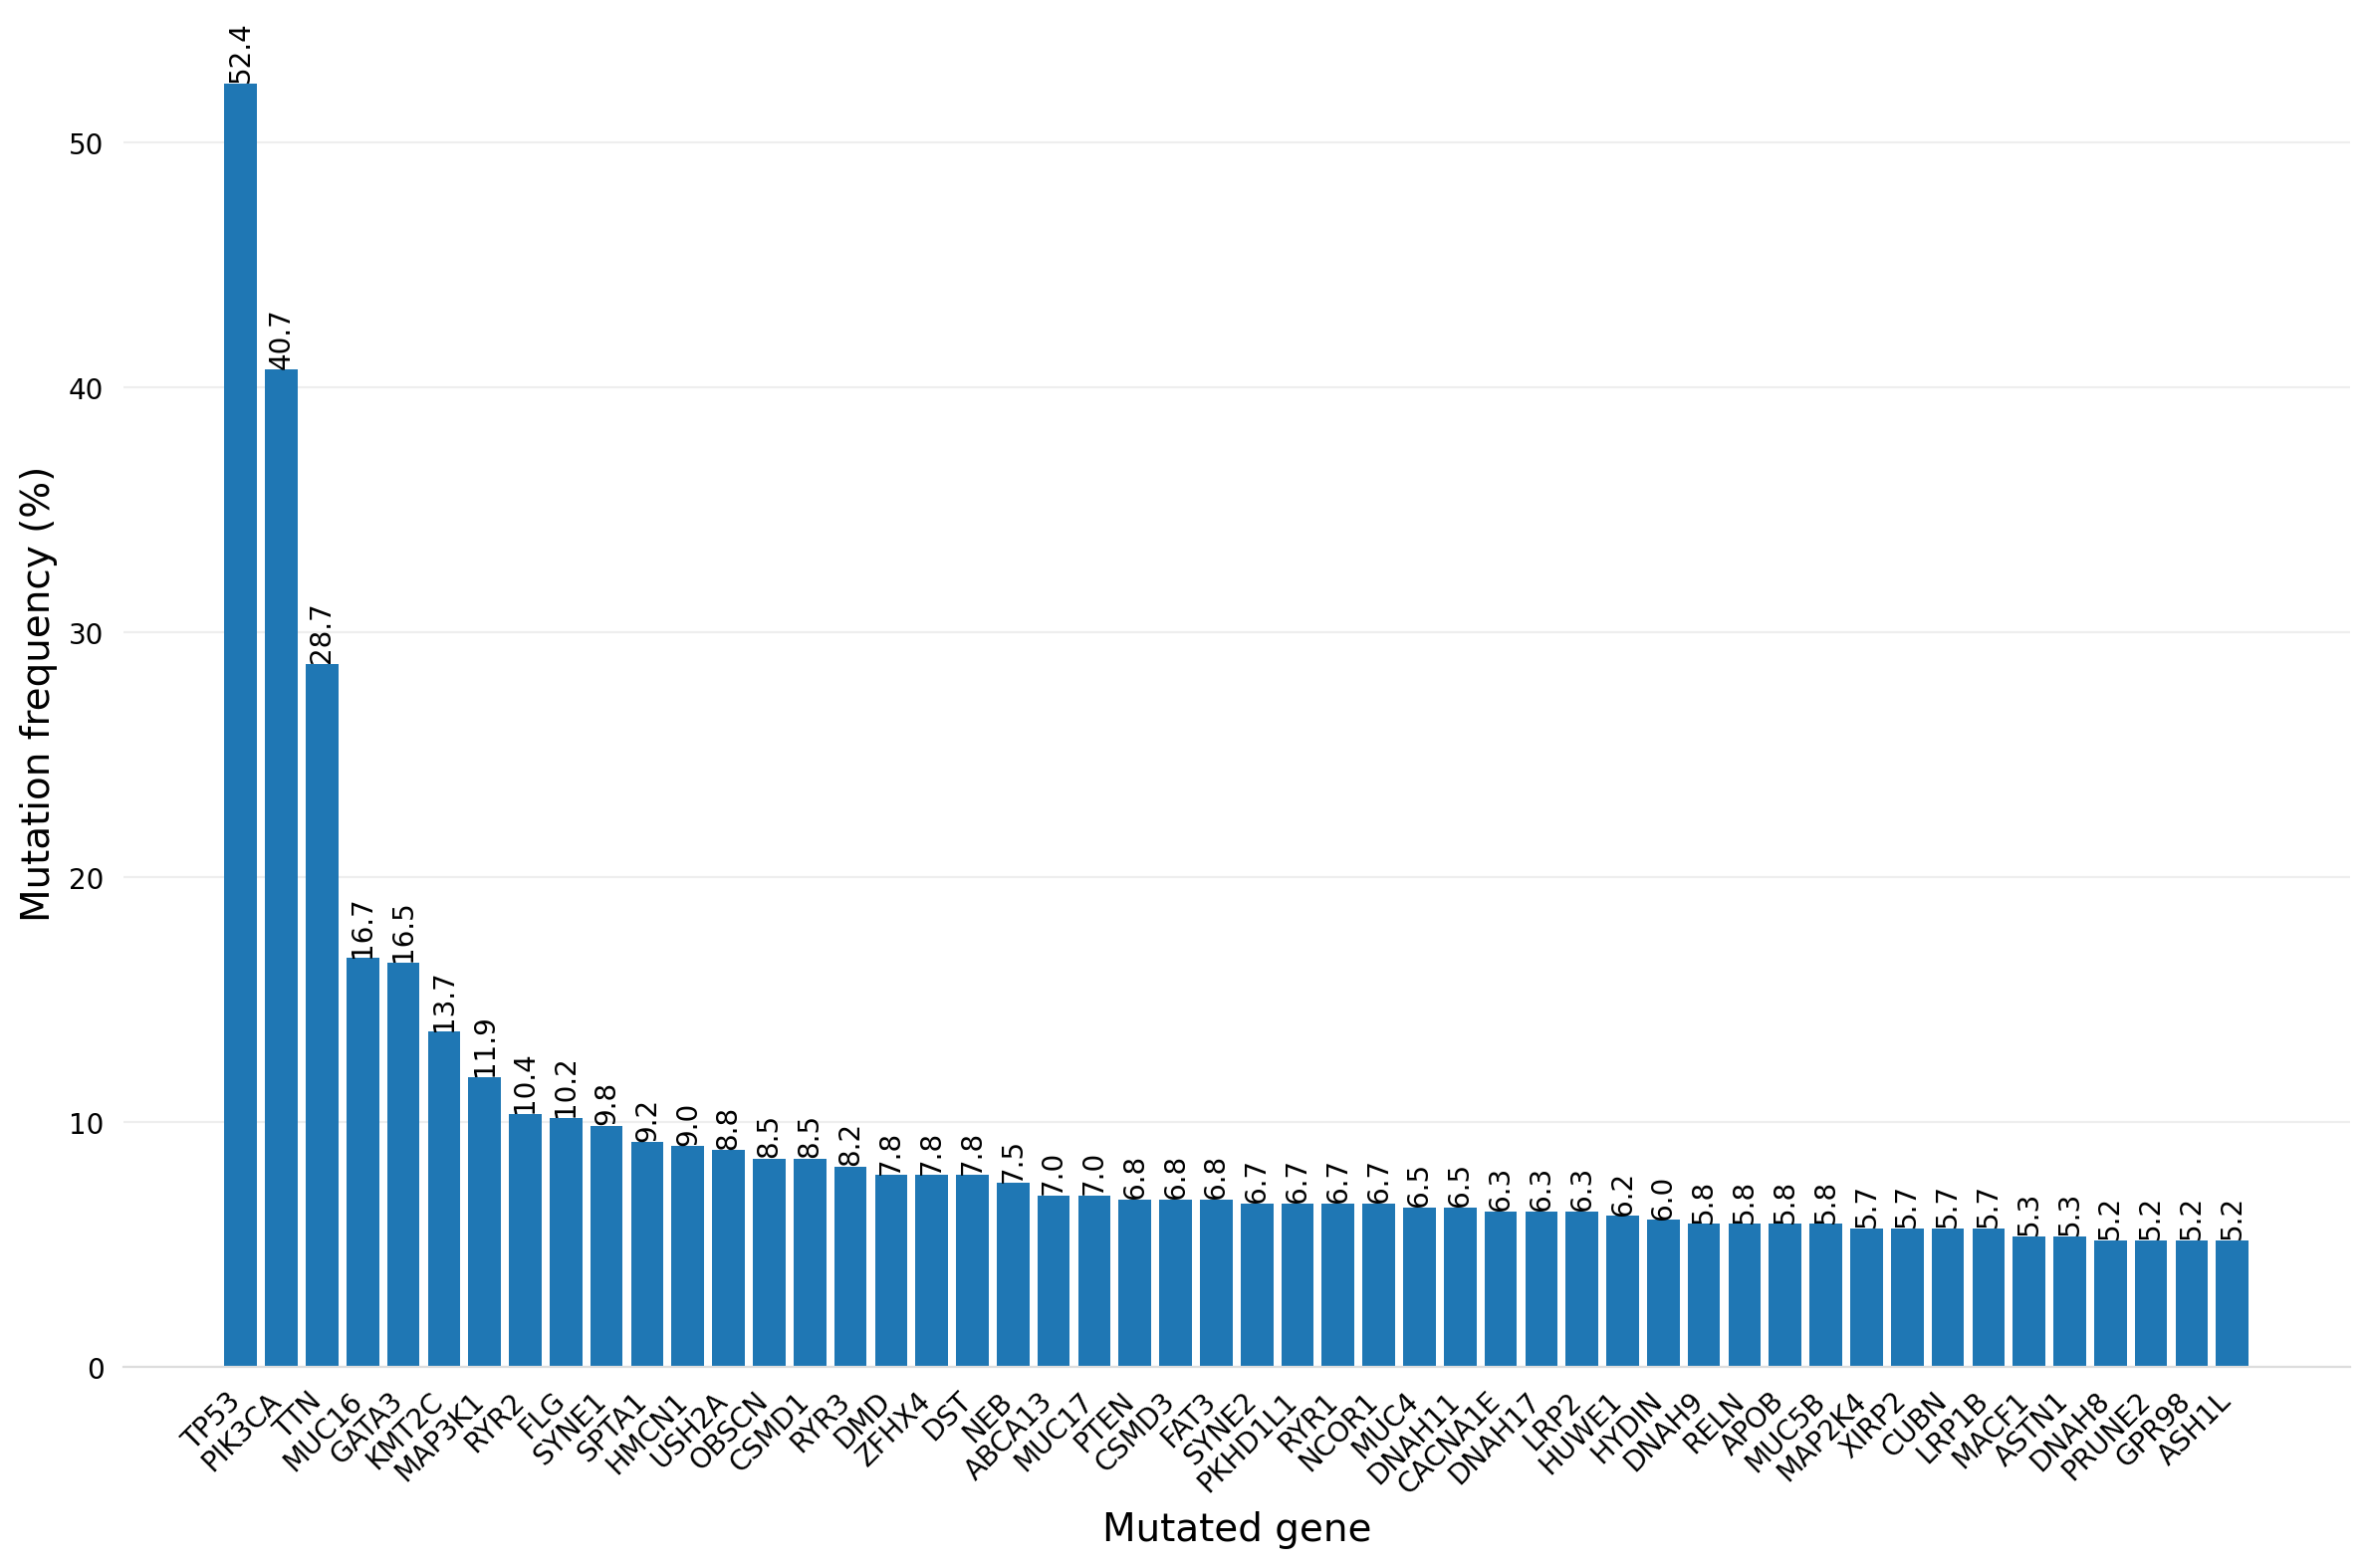

In [101]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'], highest_mutated_genes_ductal_NON_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()